# Loading

In [1]:
import glob
import numpy as np


pos = glob.glob("../data/large-movie-reviews-dataset/acl-imdb-v1/train/pos/*.txt")
neg = glob.glob("../data/large-movie-reviews-dataset/acl-imdb-v1/train/neg/*.txt")

positives = []
for f in pos:
    with open(f,'r') as file_name:
        positives.append(file_name.readlines()[0])
        
negatives = []
for f in neg:
    with open(f, 'r') as file_name:
        negatives.append(file_name.readlines()[0])
        
# merge reviews
reviews = negatives + positives

# encoding the targets
y = np.append( np.zeros_like(negatives, dtype=np.float32) , np.ones_like(positives, dtype=np.float32) )


In [2]:
from sklearn.feature_extraction.text import  TfidfVectorizer


tfidf = TfidfVectorizer(min_df=2, max_features=10000)
mat = tfidf.fit_transform(reviews).toarray()
tockens = tfidf.get_feature_names()

# Split train-test

In [3]:
test_indices = np.random.choice(np.arange(mat.shape[0]), size=int(mat.shape[0]/5), replace=False)
x_test = mat[test_indices,]
y_test = y[test_indices]
train = np.delete(mat,test_indices, axis=0)
y = np.delete(y, test_indices)

# validation set
val_indices = np.random.choice(np.arange(train.shape[0]), size=int(train.shape[0]/5), replace=False)
validation = train[val_indices,]
y_val = y[val_indices]
train = np.delete(train, val_indices, axis=0)
y = np.delete(y, val_indices)


# Network

In [4]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Using TensorFlow backend.


# Training

In [5]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

# Plotting

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_loss(val_loss,loss, epochs):
    plt.plot(epochs, val_loss, '-o', label='validation loss')
    plt.plot(epochs, loss, '-+', label='training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()
def plot_acc(val_acc, acc, epochs):
    plt.plot(epochs, val_acc, '-o', label='validation accuracy')
    plt.plot(epochs, acc, '-+', label='training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
def plot_history(history):
    history.history.keys()
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(val_loss)+1)
    plot_loss(val_loss, loss, epochs)
    plot_acc(val_acc, acc, epochs)

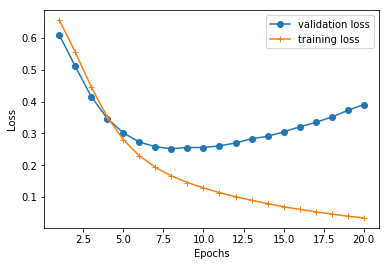

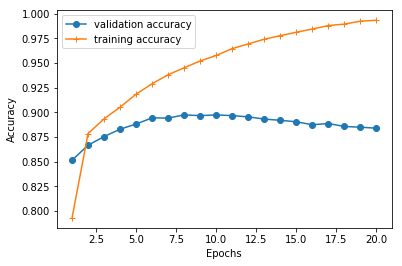

In [7]:
plot_history(history)

# Smaller network

In [8]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

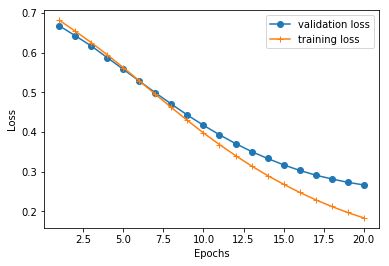

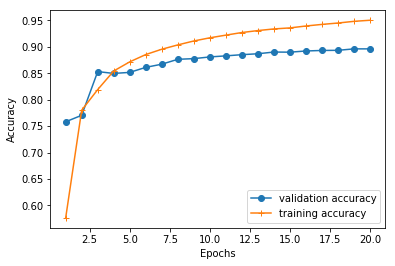

In [10]:
plot_history(history)

# Larger network

In [11]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

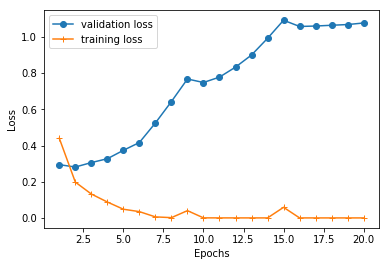

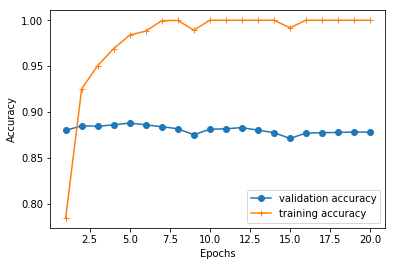

In [13]:
plot_history(history)

# Weights regularization

In [14]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

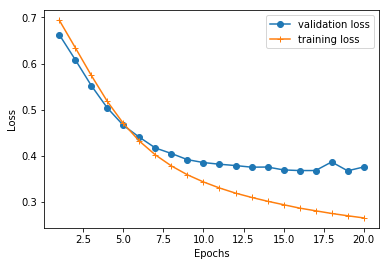

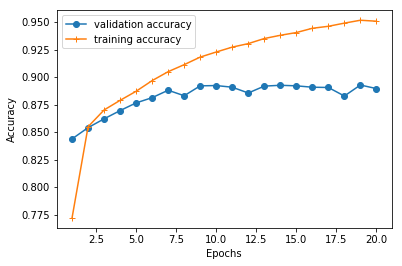

In [16]:
plot_history(history)

Increase the loss at training time. Reduce overfitting.

# L1 and L2 regularizers

In [17]:

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
history = model.fit(train,
                   y,
                   epochs=20,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

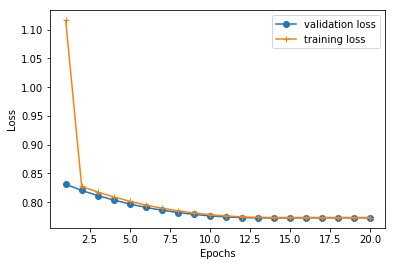

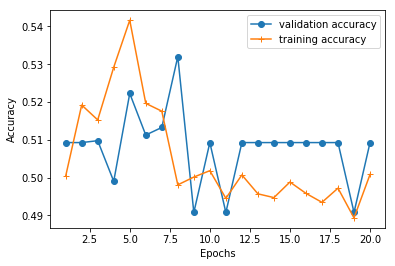

In [ ]:
plot_history(history)

No overfitting with bad performances.

In [ ]:
# extends training time
history = model.fit(train,
                   y,
                   epochs=40,
                   batch_size=512,
                   validation_data=(validation, y_val),
                   verbose=0)

In [ ]:
plot_history(history)